In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
import pycountry
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = kagglehub.dataset_download("asaniczka/top-spotify-songs-in-73-countries-daily-updated") # download dataset and save temporary folder on local PC
#print(path)
print(os.listdir(path)) # list all files from path
if "universal_top_spotify_songs.csv" in os.listdir(path):
    df = pd.read_csv(f'{path}\\universal_top_spotify_songs.csv')
    df = df.fillna('')
else:
    print(f"universal_top_spotify_songs.csv not found in {path}. I found {os.listdir(path)}")

print(df.head()) # preview the first few rows   


['universal_top_spotify_songs.csv']
               spotify_id                name                artists  \
0  2RkZ5LkEzeHGRsmDqKwmaJ            Ordinary            Alex Warren   
1  42UBPzRMh5yyz0EDPr6fr1            Manchild      Sabrina Carpenter   
2  0FTmksd2dxiE5e3rWyJXs6     back to friends                  sombr   
3  7so0lgd0zP2Sbgs2d7a1SZ    Die With A Smile  Lady Gaga, Bruno Mars   
4  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER          Billie Eilish   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1                0            2025-06-11   
1           2              -1               48            2025-06-11   
2           3               0                1            2025-06-11   
3           4               0               -1            2025-06-11   
4           5               1                0            2025-06-11   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          95    

In [4]:
headers = list(df.columns.values) # list of headers

# START check type of specific column
for head in headers:
    print(f'Name: {head}, type: {type(head)}')
# END check type of specific column

Name: spotify_id, type: <class 'str'>
Name: name, type: <class 'str'>
Name: artists, type: <class 'str'>
Name: daily_rank, type: <class 'str'>
Name: daily_movement, type: <class 'str'>
Name: weekly_movement, type: <class 'str'>
Name: country, type: <class 'str'>
Name: snapshot_date, type: <class 'str'>
Name: popularity, type: <class 'str'>
Name: is_explicit, type: <class 'str'>
Name: duration_ms, type: <class 'str'>
Name: album_name, type: <class 'str'>
Name: album_release_date, type: <class 'str'>
Name: danceability, type: <class 'str'>
Name: energy, type: <class 'str'>
Name: key, type: <class 'str'>
Name: loudness, type: <class 'str'>
Name: mode, type: <class 'str'>
Name: speechiness, type: <class 'str'>
Name: acousticness, type: <class 'str'>
Name: instrumentalness, type: <class 'str'>
Name: liveness, type: <class 'str'>
Name: valence, type: <class 'str'>
Name: tempo, type: <class 'str'>
Name: time_signature, type: <class 'str'>


In [5]:
#START check values type
print(df.dtypes)
#END check values type


spotify_id             object
name                   object
artists                object
daily_rank              int64
daily_movement          int64
weekly_movement         int64
country                object
snapshot_date          object
popularity              int64
is_explicit              bool
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object


In [6]:
df.isnull().sum() # sum null values from columns

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [7]:
duplicated_rows = df.duplicated().sum() # check duplicated rows
print(duplicated_rows)

0


In [8]:
""" Empty country's ISO code is GLOBAL TOP 50 """

mask = df['country'].isna() | (df['country'] == "")

if not df[mask].empty:
    #print(df.loc[mask, ['daily_rank', 'name', 'artists', 'album_release_date']])
    dates = df.loc[mask, ['album_release_date']]
    print(dates.values)

[['2024-09-26']
 ['2025-06-05']
 ['2024-12-27']
 ...
 ['2023-10-13']
 ['2023-09-20']
 ['2019-08-23']]


In [9]:
""" convert iso code to country name """

def iso_to_name(iso):
    try:
        country = pycountry.countries.get(alpha_2=iso)
        return country.name if country else None
    except KeyError:
        return None

In [10]:
reverted_mask = df[~(df['country'].isna() | (df['country'] == ""))].copy() # copy to avoid SettingWithCopyWarning

reverted_mask['country_name'] = reverted_mask['country'].apply(iso_to_name) #convert iso to country name

#print(reverted_mask[['country', 'country_name', 'name', 'artists']])
unique_pairs = reverted_mask[['country', 'country_name']].drop_duplicates()
countries = dict(zip(unique_pairs['country'], unique_pairs['country_name']))
print(countries)

{'ZA': 'South Africa', 'VN': 'Viet Nam', 'VE': 'Venezuela, Bolivarian Republic of', 'UY': 'Uruguay', 'US': 'United States', 'UA': 'Ukraine', 'TW': 'Taiwan, Province of China', 'TR': 'Türkiye', 'TH': 'Thailand', 'SV': 'El Salvador', 'SK': 'Slovakia', 'SG': 'Singapore', 'SE': 'Sweden', 'SA': 'Saudi Arabia', 'RO': 'Romania', 'PY': 'Paraguay', 'PT': 'Portugal', 'PL': 'Poland', 'PK': 'Pakistan', 'PH': 'Philippines', 'PE': 'Peru', 'PA': 'Panama', 'NZ': 'New Zealand', 'NO': 'Norway', 'NL': 'Netherlands', 'NI': 'Nicaragua', 'NG': 'Nigeria', 'MY': 'Malaysia', 'MX': 'Mexico', 'MA': 'Morocco', 'LV': 'Latvia', 'LU': 'Luxembourg', 'LT': 'Lithuania', 'KZ': 'Kazakhstan', 'KR': 'Korea, Republic of', 'JP': 'Japan', 'IT': 'Italy', 'IS': 'Iceland', 'IN': 'India', 'IL': 'Israel', 'IE': 'Ireland', 'ID': 'Indonesia', 'HU': 'Hungary', 'HN': 'Honduras', 'HK': 'Hong Kong', 'GT': 'Guatemala', 'GR': 'Greece', 'FR': 'France', 'FI': 'Finland', 'ES': 'Spain', 'EG': 'Egypt', 'EE': 'Estonia', 'EC': 'Ecuador', 'DO': '

In [11]:
reverted_mask = df[~(df['country'].isna() | (df['country'] == ""))].copy()
dict(zip(reverted_mask['name'], reverted_mask['artists']))
 
counts = df.groupby(['name', 'artists']).size().reset_index(name='count') # count artists and songs 
#print(counts)

max_row = counts.loc[counts['count'].idxmax()]

print(max_row) # maximum number of occurrences

name       BIRDS OF A FEATHER
artists         Billie Eilish
count                   16673
Name: 1893, dtype: object


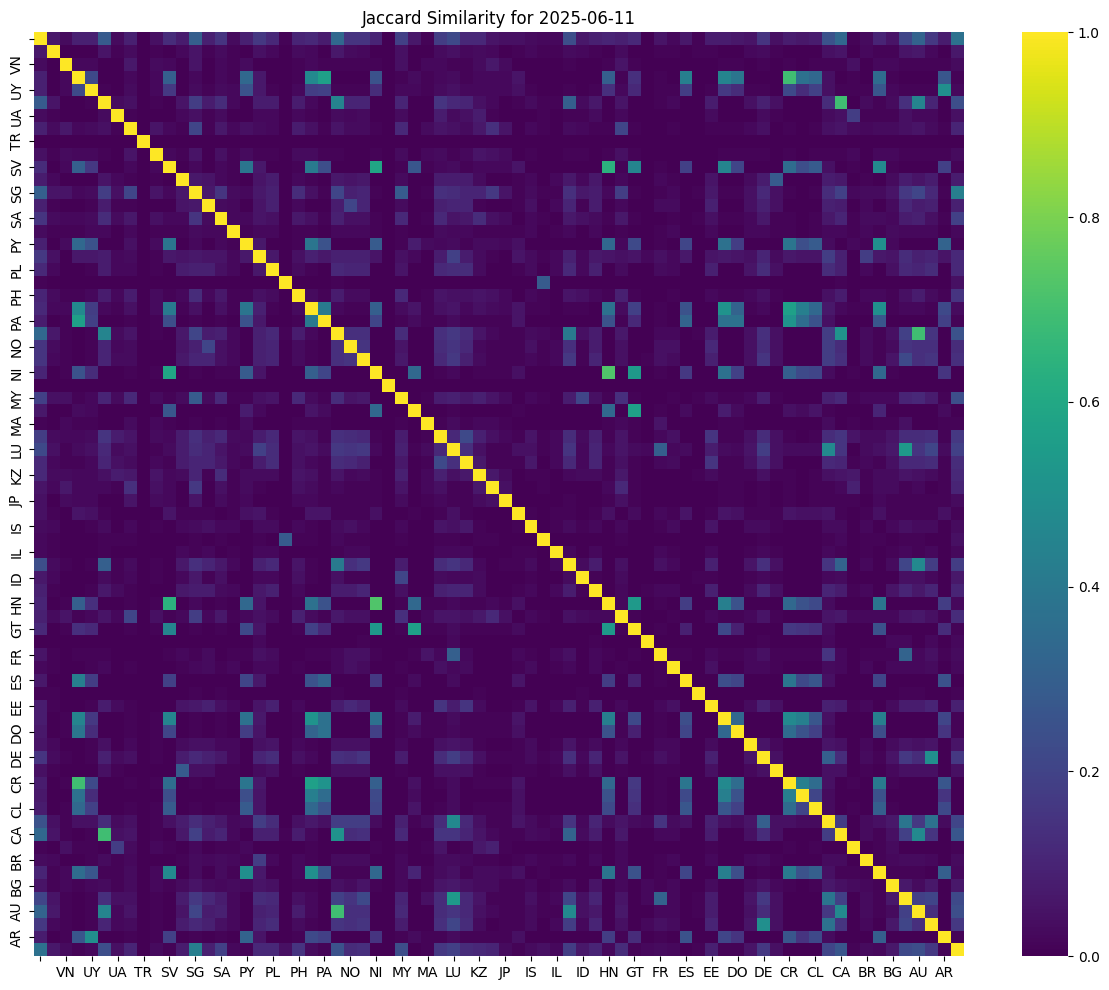

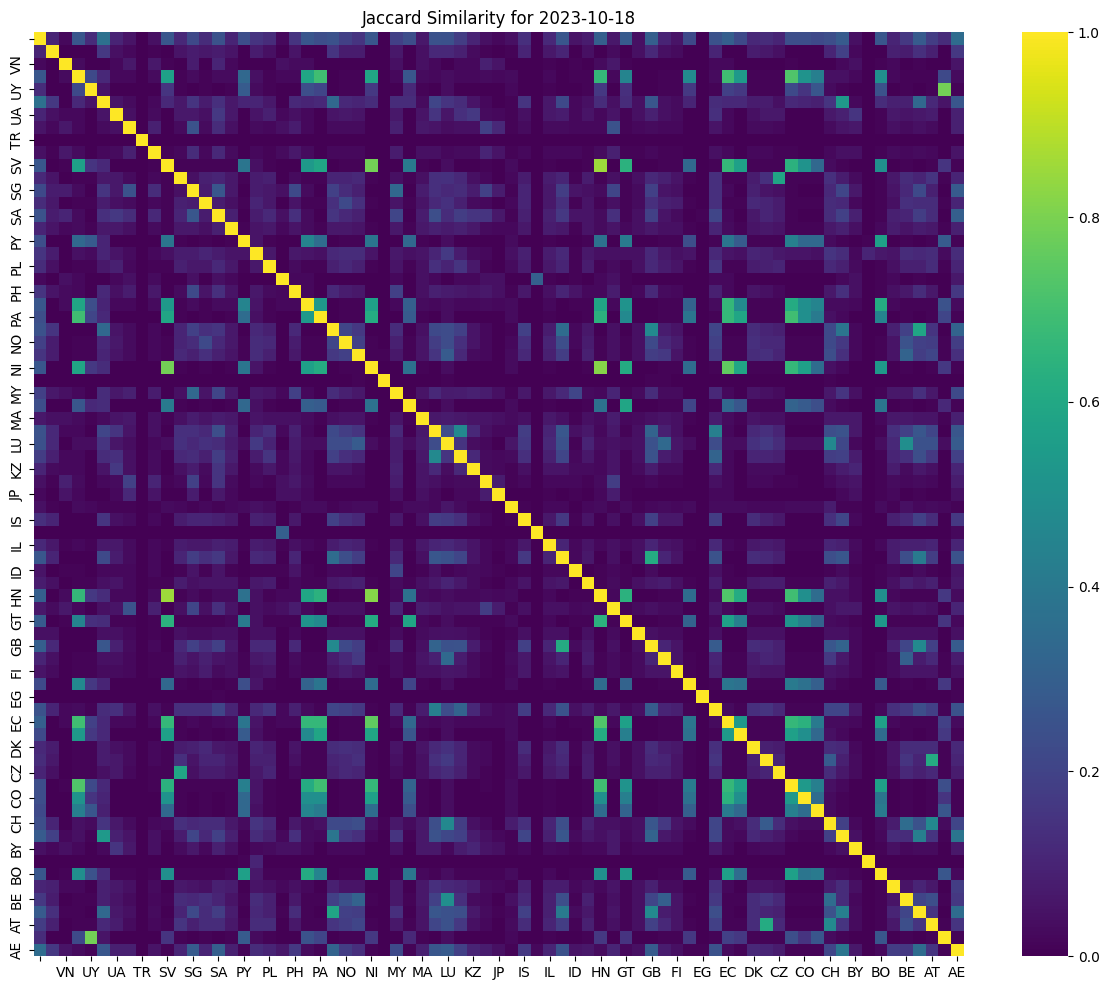

In [14]:
""" LATEST DATE """

latest_date = df['snapshot_date'].max()
df_latest = df[df['snapshot_date'] == latest_date]

countries = df_latest['country'].unique()
sets = {c: set(df_latest[df_latest['country']==c]['spotify_id']) for c in countries}


# Jaccard matrix for latest date
matrix = pd.DataFrame(index=countries, columns=countries, dtype=float)
for a in countries:
    for b in countries:
        inter = sets[a].intersection(sets[b])
        union = sets[a].union(sets[b])
        matrix.loc[a,b] = len(inter)/len(union) if union else np.nan

# create heatmap
plt.figure(figsize=(15,12))
sns.heatmap(matrix, cmap='viridis')
plt.title(f'Jaccard Similarity for {latest_date}')
plt.show()

""" OLDEST DATE """
oldest_date = df['snapshot_date'].min()
df_oldest = df[df['snapshot_date'] == oldest_date]

countries = df_oldest['country'].unique()
sets = {c: set(df_oldest[df_oldest['country']==c]['spotify_id']) for c in countries}


# Jaccard matrix for latest date
matrix = pd.DataFrame(index=countries, columns=countries, dtype=float)
for a in countries:
    for b in countries:
        inter = sets[a].intersection(sets[b])
        union = sets[a].union(sets[b])
        matrix.loc[a,b] = len(inter)/len(union) if union else np.nan

# create heatmap
plt.figure(figsize=(15,12))
sns.heatmap(matrix, cmap='viridis')
plt.title(f'Jaccard Similarity for {oldest_date}')
plt.show()